In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df= pd.read_csv("cost_predict.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


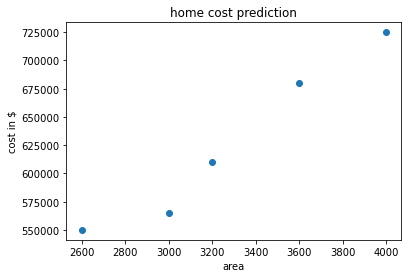

In [41]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("cost in $")
plt.title("home cost prediction")
plt.scatter(df.area,df.price)


In [46]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [43]:
price=df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [48]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [49]:
reg.coef_

array([135.78767123])

In [50]:
reg.intercept_

180616.43835616432

In [55]:
reg.predict([[3300]])

array([628715.75342466])

In [56]:
reg.predict([[3300]])

array([628715.75342466])

In [84]:
area_df=pd.read_csv("cost_predict.csv",'sheet1',)
area_df.head(3)

<ipython-input-84-b9b5cb2da5ab>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  area_df=pd.read_csv("cost_predict.csv",'sheet1',)


,area
0,1000
1,1500
2,2300


In [85]:
p= reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1144708.90410959])

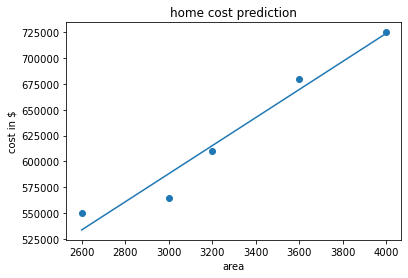

In [92]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("cost in $")
plt.title("home cost prediction")
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[['area']]))

In [86]:
area_df['cost']=p
area_df

,area,cost
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [88]:
area_df.to_csv('prediction.csv',index=False)

In [13]:
import pickle

In [15]:
with open ('model_pickle','wb') as file:
    pickle.dump('model',file)

In [17]:
with open ('model_pickle','rb') as file:
    mp= pickle.load(file)

In [21]:
mp.predict([[5000]])

AttributeError: 'str' object has no attribute 'predict'